In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from math import exp, pow, log
import pylab
from scipy.interpolate import interp1d
%matplotlib inline

#Постоянные и коэффициенты перевода
aem = 1.66054e-27
evToT = 11604.52500617
pi = 3.1415926535
e = 1.6021766e-19
k = 1.380648e-23
m = 9.1e-31
h_ = h / (2 * pi)

In [108]:
#Параметры задачи
q0 = [1e6, 1e7 ,1e8 , 1e9]
r = 0.1
mu = 1e3
L = 5.4e6
U = 0.75 * L / 8.31
lmbd = 390
ro = 8.9e3
c = 360
cs = 3710
hi = lmbd / (ro * c)
kappa = 0.87
sigma = 5.67e-8

eps = 1e-21
xstart = 0
xend = 10
xstep = 1e-02


# Анал

In [109]:
#итерируемся для получения скорости и температуры фронта
curr_vf = (1 - r) * q0[0] / (ro * L)
prev_vf = 0
curr_Tf = U / log(cs / curr_vf)
prev_Tf = 0

while(abs(curr_vf - prev_vf) > eps):
    prev_vf = curr_vf
    prev_Tf = curr_Tf
    curr_vf = (1 - r) * q0[0] / (ro *(L + c * curr_Tf))
    curr_Tf = U / log(cs / curr_vf)
    print(curr_Tf)
    #print((curr_vf - prev_vf))
print("Vf:", curr_vf)
print("Tf:", curr_Tf)


24249.568113015932
24287.78574717313
24286.607820251556
24286.644106968313
24286.642989117263
24286.64302355384
24286.643022492983
24286.643022525666
24286.64302252466
24286.643022524688
24286.643022524688
24286.643022524688
Vf: 7.1499841878432625e-06
Tf: 24286.643022524688


In [9]:
x_graph = np.arange(xstart, xend + xstep, xstep)
T_graph = [] #np.zeros(x_graph.shape)
def T(x, Tf, vf):
    return (Tf + (1 - r) * q0[0] / (ro * c * (vf - mu * hi))) * exp(-vf * x / hi) +\
           (1 - r) * q0[0] / (ro * c * (vf - mu * hi)) * exp(-mu * x) #+ hi * 4 * kappa * sigma * Tf ** 4 * x  / vf

for x in x_graph:
    #T_graph.append(T(x, 1000, curr_vf))
    T_graph.append(T(x, curr_Tf, curr_vf))


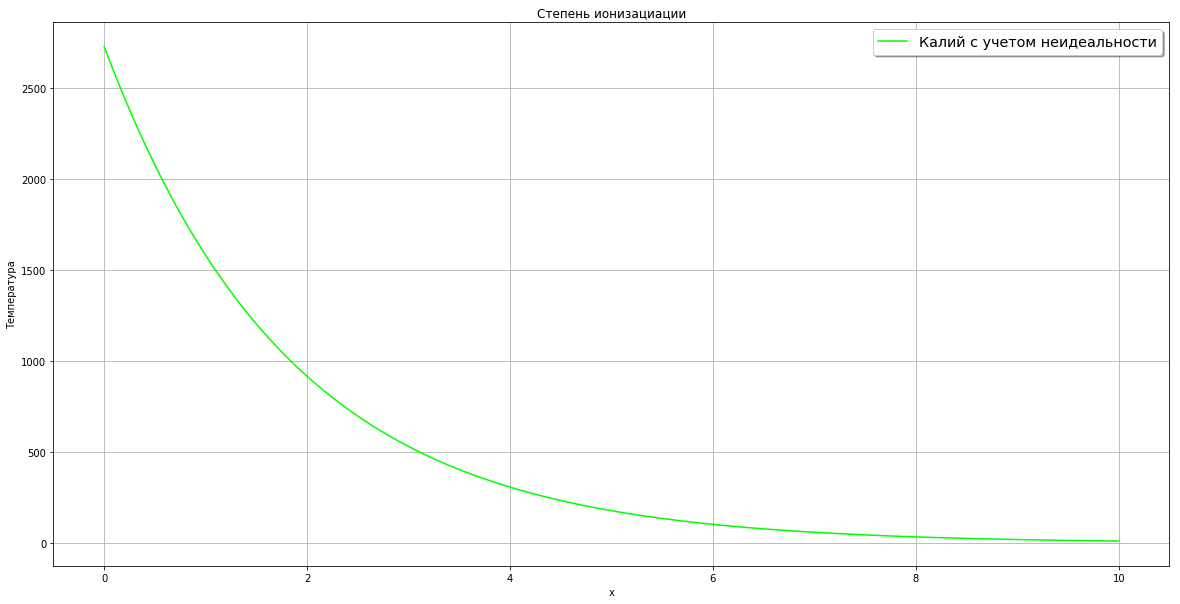

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x_graph, T_graph, 'lime', label='Калий с учетом неидеальности')

ax.set_title(u'Степень ионизациации')

ax.yaxis.set_label_position('left')
ax.set_ylabel(u'Температура')

ax.xaxis.set_label_position('bottom')
ax.set_xlabel(u'x')
legend = ax.legend(loc='best', shadow=True, fontsize='x-large')

legend.get_frame().set_facecolor('white')
ax.grid(True)
plt.show()

# Вычматы

In [204]:
#n = 101
#x_s = 0
#x_e = 100

n = 401
x_s = 0
x_e = 4

h = (x_e - x_s) / (n - 1)
print(h)
x = np.linspace(x_s, x_e, n)
T = np.ones_like(x)
T[0] = curr_Tf
T[-1] = 300
#print(T)

1#A = 1 / (2 - curr_vf * h / hi)
#B = (1 - curr_vf * h / hi) / (2 - curr_vf * h / hi)
#C = mu * (1 - r) * q0[0] / (ro * c * hi * (2 - curr_vf * h / hi))
#D = 4 * kappa * sigma / (ro * c * hi * (2 - curr_vf * h / hi))
a = curr_vf / hi

A = (a * h) / (a * h - 2) - 1
B = 1/(a * h - 2)
C = h * h * mu * ((1 - r) * q0[0] / (ro * c * hi )) /(a * h - 2)
#D = h * h * 4 * kappa * sigma / ((ro * c * hi ) * (a * h - 2))
#print(C)


0.01


In [205]:
count = 0
for _ in range(50):
    for i in T:
        if (count == 0):
            count += 1
            continue
        if (count == n - 1):
            continue
        T[count] = A * T[count-1] - B * T[count+1] - C * exp(- mu * x[count]) #- D * (T[i]) ** 4
        count += 1
        #print( A* T[i-1],B * T[i+1],C * exp(- mu * x[i]),D * (T[i]) ** 4)

In [200]:
1#for _ in range(6):
#    for i in range(x_s + 1, x_e, h):
#       T[i] = A * T[i+1] + B * T[i-1] + C * exp(- mu * x[i]) + D * (T[i]) ** 4



1

In [201]:
#print(T)

[ 24286.64302252 -24293.27270249  24300.90986417 -24307.54897551
  24315.19033112 -24321.83363786  24329.4791901  -24336.1266947
  24343.77644603 -24350.42815096  24358.08210386 -24364.73801159
  24372.39616851 -24379.0562815   24386.71864493 -24393.38296566
  24401.04953806 -24407.71806901  24415.38885286 -24422.06159648
  24429.73659426 -24436.41355304  24444.09276721 -24450.77394364
  24458.45737668 -24465.14277323  24472.83042763 -24479.52004677
  24487.211925   -24493.90576922  24501.60187377 -24508.29994555
  24516.00027891 -24522.70258073  24530.40714537 -24537.11367972
  24544.82247814 -24551.53324751  24559.24628219 -24565.96128907
  24573.6785625  -24580.39780937  24588.11932405 -24594.84281341
  24602.56857182 -24609.29630616  24617.0263108  -24623.75829261
  24631.49254598 -24638.22877777  24645.96728235 -24652.70776661
  24660.45052491 -24667.19526414  24674.94227866 -24681.69127535
  24689.44254859 -24696.19580526  24703.95133972 -24710.70885887
  24718.46865706 -24725.23

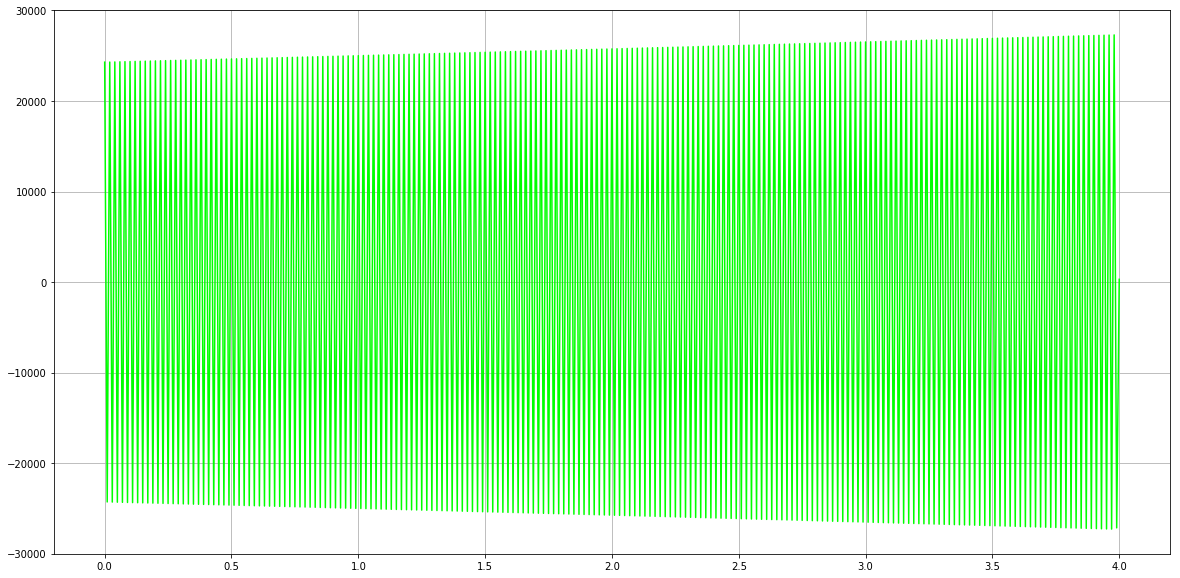

In [202]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x, T, 'lime', label='Калий с учетом неидеальности')
ax.grid(True)
plt.show()